# Datafaucet

Datafaucet is a productivity framework for ETL, ML application. Simplifying some of the common activities which are typical in Data pipeline such as project scaffolding, data ingesting, start schema generation, forecasting etc.

In [1]:
import datafaucet as dfc

## Loading and Saving Data

In [2]:
dfc.project.load()

created SparkEngine
Init engine "spark"
Configuring packages:
  -  com.microsoft.sqlserver:mssql-jdbc:6.4.0.jre8
  -  mysql:mysql-connector-java:8.0.12
  -  org.apache.hadoop:hadoop-aws:3.1.1
  -  org.postgresql:postgresql:42.2.5
Configuring conf:
  -  spark.hadoop.fs.s3a.access.key : ****** (redacted)
  -  spark.hadoop.fs.s3a.endpoint : http://minio:9000
  -  spark.hadoop.fs.s3a.impl : org.apache.hadoop.fs.s3a.S3AFileSystem
  -  spark.hadoop.fs.s3a.path.style.access : true
  -  spark.hadoop.fs.s3a.secret.key : ****** (redacted)
Connecting to spark master: local[*]
Engine context spark:2.4.1 successfully started


In [3]:
query = """
    SELECT 
        p.payment_date,
        p.amount,
        p.rental_id,
        p.staff_id,
        c.*
    FROM payment p 
    INNER JOIN customer c 
        ON p.customer_id = c.customer_id;
    """

df = dfc.load(query, 'pagila')

#### Select cols

In [4]:
df.cols.find('id').columns

['rental_id', 'staff_id', 'customer_id', 'store_id', 'address_id']

In [5]:
df.cols.find(by_type='string').columns

['first_name', 'last_name', 'email']

In [6]:
df.cols.find(by_func=lambda x: x.startswith('st')).columns

['staff_id', 'store_id']

In [7]:
df.cols.find('^st').columns

['staff_id', 'store_id']

#### Collect data, oriented by rows or cols

In [8]:
df.cols.find(by_type='numeric').rows.collect(3)

,amount,rental_id,staff_id,customer_id,store_id,address_id,active
0,1.99,7,2,269,1,274,1
1,0.99,98,1,269,1,274,1
2,6.99,678,2,269,1,274,1


In [9]:
df.cols.find(by_type='string').collect(3)

,0,1,2
first_name,CASSANDRA,CASSANDRA,CASSANDRA
last_name,WALTERS,WALTERS,WALTERS
email,CASSANDRA.WALTERS@sakilacustomer.org,CASSANDRA.WALTERS@sakilacustomer.org,CASSANDRA.WALTERS@sakilacustomer.org


In [10]:
df.cols.find('name', 'date').data.collect(3)

,payment_date,first_name,last_name,create_date,last_update
0,2007-01-24 21:40:19.996577,CASSANDRA,WALTERS,2006-02-14,2006-02-15 09:57:20
1,2007-01-25 15:16:50.996577,CASSANDRA,WALTERS,2006-02-14,2006-02-15 09:57:20
2,2007-01-28 21:44:14.996577,CASSANDRA,WALTERS,2006-02-14,2006-02-15 09:57:20


#### Get just one row or column

In [11]:
df.cols.find('active', 'amount', 'name').one()

,0
activebool,True
active,1
amount,1.99
first_name,CASSANDRA
last_name,WALTERS


In [12]:
df.cols.find('active', 'amount', 'name').rows.one()

,amount,first_name,last_name,activebool,active
0,1.99,CASSANDRA,WALTERS,True,1


#### Grid view

In [13]:
df.cols.find('amount', 'id', 'name').data.grid(5)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

#### Data Exploration

In [14]:
df.cols.find('amount', 'id', 'name').data.facets()

#### Rename columns

In [31]:
df.cols.find(by_type='timestamp').rename('new_', '***').columns

['new_payment_date***',
 'amount',
 'rental_id',
 'staff_id',
 'customer_id',
 'store_id',
 'first_name',
 'last_name',
 'email',
 'address_id',
 'activebool',
 'create_date',
 'new_last_update***',
 'active']

In [32]:
# to do
# df.cols.rename(transform=['unidecode', 'alnum', 'alpha', 'num', 'lower', 'trim', 'squeeze', 'slice', tr("abc", "_", mode='')'])
# df.cols.rename(transform=['unidecode', 'alnum', 'lower', 'trim("_")', 'squeeze("_")'])

In [33]:
# as a dictionary
mapping = {
    'staff_id': 'foo', 
    'first_name': 'bar',
    'email': 'qux',
    'active':'active'
}

# or as a list of 2-tuples
mapping = [
    ('staff_id','foo'),
    ('first_name','bar'),
    'active'
]

dict(zip(df.columns, df.cols.rename('new_', '***', mapping).columns))

{'payment_date': 'payment_date',
 'amount': 'amount',
 'rental_id': 'rental_id',
 'staff_id': 'new_foo***',
 'customer_id': 'customer_id',
 'store_id': 'store_id',
 'first_name': 'new_bar***',
 'last_name': 'last_name',
 'email': 'email',
 'address_id': 'address_id',
 'activebool': 'activebool',
 'create_date': 'create_date',
 'last_update': 'last_update',
 'active': 'new_active***'}

#### Drop multiple columns

In [34]:
df.cols.find('id').drop().rows.collect(3)

,payment_date,amount,first_name,last_name,email,activebool,create_date,last_update,active
0,2007-01-24 21:40:19.996577,1.99,CASSANDRA,WALTERS,CASSANDRA.WALTERS@sakilacustomer.org,True,2006-02-14,2006-02-15 09:57:20,1
1,2007-01-25 15:16:50.996577,0.99,CASSANDRA,WALTERS,CASSANDRA.WALTERS@sakilacustomer.org,True,2006-02-14,2006-02-15 09:57:20,1
2,2007-01-28 21:44:14.996577,6.99,CASSANDRA,WALTERS,CASSANDRA.WALTERS@sakilacustomer.org,True,2006-02-14,2006-02-15 09:57:20,1


#### Apply to multiple columns

In [35]:
from pyspark.sql import functions as F

(df
    .cols.find(by_type='string').lower()
    .cols.get('email').split('@')
    .cols.get('email').expand(2)
    .cols.find('name', 'email')
    .rows.collect(3)
)

,first_name,last_name,email_0,email_1
0,cassandra,walters,cassandra.walters,sakilacustomer.org
1,cassandra,walters,cassandra.walters,sakilacustomer.org
2,cassandra,walters,cassandra.walters,sakilacustomer.org


### Aggregations

In [36]:
from datafaucet.spark import aggregations as A

In [37]:
df.cols.find('amount', '^st.*id', 'first_name').agg(A.all).cols.collect(10)

,0,1,2,3
sum,67416.5,24041,23350,NaN
max,11.99,2.00,2.00,ZACHARY
zero,24,0,0,NaN
min,0.00,1.00,1.00,AARON
spaces_only,0,0,0,0
distinct,19,2,2,591
boolean,3003,8057,8748,0
skewness,0.459478,0.00810026,0.18106,NaN
neg,0,0,0,NaN
type,"DecimalType(5,2)",ShortType,ShortType,StringType


##### group by a set of columns

In [25]:
df.cols.find('amount').groupby('staff_id', 'store_id').agg(A.all).cols.collect(4)

,0,1,2,3
colname,amount,amount,amount,amount
sum,18436.97,15362.49,18564.55,15052.50
max,11.99,11.99,11.99,10.99
zero,7,2,7,8
min,0.00,0.00,0.00,0.00
spaces_only,0,0,0,0
distinct,16,16,17,15
boolean,851,697,763,692
skewness,0.460754,0.428481,0.450257,0.50087
neg,0,0,0,0


#### Aggregate specific metrics 

In [38]:
# by function
df.cols.get('amount', 'active').groupby('customer_id').agg({'count':F.count, 'sum': F.sum}).rows.collect(10)

# or by alias
df.cols.get('amount', 'active').groupby('customer_id').agg('count','sum').rows.collect(10)

# or a mix of the two
df.cols.get('amount', 'active').groupby('customer_id').agg('count',{'sum': F.sum}).rows.collect(10)

,customer_id,colname,count,sum
0,463,active,25,25.00
1,471,active,27,27.00
2,496,active,21,21.00
3,148,active,46,46.00
4,243,active,24,24.00
5,392,active,23,23.00
6,540,active,24,24.00
7,516,active,26,26.00
8,31,active,26,26.00
9,451,active,33,33.00


#### Featurize specific metrics in a single row

In [41]:
(df
     .cols.get('amount', 'active')
          .groupby('customer_id', 'store_id')
          .featurize({'count':A.count, 'sum':A.sum, 'avg':A.avg})
     .rows.collect(10)
)

# todo:
# different features per different column

,customer_id,store_id,active_count,active_sum,active_avg,amount_count,amount_sum,amount_avg
0,307,2,30,30.00,1.0,30,134.70,4.490000
1,348,2,36,36.00,1.0,36,146.64,4.073333
2,92,2,28,28.00,1.0,28,133.72,4.775714
3,423,2,26,26.00,1.0,26,120.74,4.643846
4,185,1,23,23.00,1.0,23,84.77,3.685652
5,118,1,21,21.00,1.0,21,82.79,3.942381
6,108,1,30,30.00,1.0,30,132.70,4.423333
7,62,1,23,23.00,1.0,23,84.77,3.685652
8,280,2,27,27.00,1.0,27,118.73,4.397407
9,105,1,26,26.00,1.0,26,120.74,4.643846


#### Plot dataset statistics

In [55]:
df.data.summary()

AttributeError: 'DataFrame' object has no attribute 'data'

In [43]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [51]:
from bokeh.plotting import figure, show, output_file

p = figure(plot_width=400, plot_height=400)
p.hbar(y=[1, 2, 3], height=0.5, left=0,
       right=[1.2, 2.5, 3.7], color="navy")

show(p)

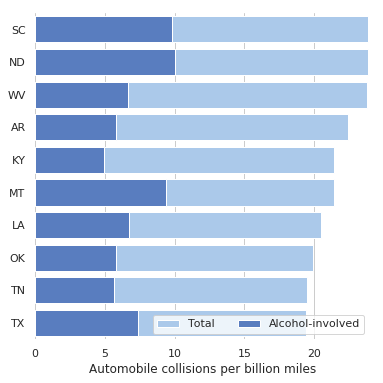

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)[:10]

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


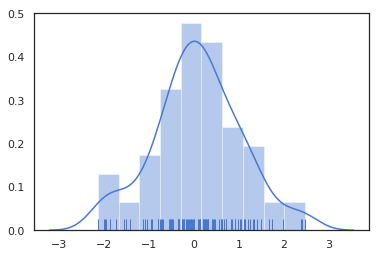

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)

# Generate a random univariate dataset
rs = np.random.RandomState(10)
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, hist=True, kde=True, rug=True, color="b");

In [54]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [49]:
from IPython.display import HTML

HTML('''
    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css" crossorigin="anonymous">
<div class="container-fluid">
<div class="jumbotron">
  <h1 class="display-4">Hello, world!</h1>
  <p class="lead">This is a simple hero unit, a simple jumbotron-style component for calling extra attention to featured content or information.</p>
  <hr class="my-4">
  <p>It uses utility classes for typography and spacing to space content out within the larger container.</p>
  <a class="btn btn-primary btn-lg" href="#" role="button">Learn more</a>
</div>
<button type="button" class="btn btn-secondary" data-toggle="tooltip" data-placement="top" title="Tooltip on top">
  Tooltip on top
</button>
<button type="button" class="btn btn-secondary" data-toggle="tooltip" data-placement="right" title="Tooltip on right">
  Tooltip on right
</button>
<button type="button" class="btn btn-secondary" data-toggle="tooltip" data-placement="bottom" title="Tooltip on bottom">
  Tooltip on bottom
</button>
<button type="button" class="btn btn-secondary" data-toggle="tooltip" data-placement="left" title="Tooltip on left">
  Tooltip on left
</button>
<table class="table">
  <thead>
    <tr>
      <th scope="col">#</th>
      <th scope="col">First</th>
      <th scope="col">Last</th>
      <th scope="col">Handle</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th scope="row">1</th>
      <td>Mark</td>
      <td>Otto</td>
      <td>@mdo</td>
    </tr>
    <tr>
      <th scope="row">2</th>
      <td>Jacob</td>
      <td>Thornton</td>
      <td>@fat</td>
    </tr>
    <tr>
      <th scope="row">3</th>
      <td>Larry</td>
      <td>the Bird</td>
      <td>@twitter</td>
    </tr>
  </tbody>
</table>
<span class="badge badge-primary">Primary</span>
<span class="badge badge-secondary">Secondary</span>
<span class="badge badge-success">Success</span>
<span class="badge badge-danger">Danger</span>
<span class="badge badge-warning">Warning</span>
<span class="badge badge-info">Info</span>
<span class="badge badge-light">Light</span>
<span class="badge badge-dark">Dark</span>
<table class="table table-sm" style="text-align:left">
  <thead>
    <tr>
      <th scope="col">#</th>
      <th scope="col">First</th>
      <th scope="col">Last</th>
      <th scope="col">Handle</th>
      <th scope="col">bar</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th scope="row">1</th>
      <td>Mark</td>
      <td>Otto</td>
      <td>@mdo</td>
      <td class="text-left"><span class="badge badge-primary" style="width: 75%">Primary</span></td>
    </tr>
    <tr>
      <th scope="row">2</th>
      <td>Jacob</td>
      <td>Thornton</td>
      <td>@fat</td>
      <td class="text-left"><span class="badge badge-secondary" style="width: 25%">Primary</span></td>
    </tr>
    <tr>
      <th scope="row">3</th>
      <td colspan="2">Larry the Bird</td>
      <td>@twitter</td>
      <td class="text-left"><span class="badge badge-warning" style="width: 55%">Primary</span></td>
</div>
    </tr>
  </tbody>
</table>
</div>''')

In [50]:
tbl = '''
<table class="table table-sm">
  <thead>
    <tr>
      <th scope="col">#</th>
      <th scope="col">First</th>
      <th scope="col">Last</th>
      <th scope="col">Handle</th>
      <th scope="col">bar</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th scope="row">1</th>
      <td>Mark</td>
      <td>Otto</td>
      <td>@mdo</td>
      <td class="text-left"><span class="badge badge-primary" style="width: 75%">75%</span></td>
    </tr>
    <tr>
      <th scope="row">2</th>
      <td>Jacob</td>
      <td>Thornton</td>
      <td>@fat</td>
      <td class="text-left"><span class="badge badge-secondary" style="width: 25%" title="Tooltip on top">25%</span></td>
    </tr>
    <tr>
      <th scope="row">3</th>
      <td colspan="2">Larry the Bird</td>
      <td>@twitter</td>
      <td class="text-left"><span class="badge badge-warning" style="width: 0%">0%</span></td>
    </tr>
  </tbody>
</table>
'''
drp = '''
<div class="dropdown">
  <button class="btn btn-secondary dropdown-toggle" type="button" id="dropdownMenuButton" data-toggle="dropdown" aria-haspopup="true" aria-expanded="false">
    Dropdown button
  </button>
  <div class="dropdown-menu" aria-labelledby="dropdownMenuButton">
    <a class="dropdown-item" href="#">Action</a>
    <a class="dropdown-item" href="#">Another action</a>
    <a class="dropdown-item" href="#">Something else here</a>
  </div>
</div>'''

tabs = f'''
<nav>
  <div class="nav nav-tabs" id="nav-tab" role="tablist">
    <a class="nav-item nav-link active" id="nav-home-tab" data-toggle="tab" href="#nav-home" role="tab" aria-controls="nav-home" aria-selected="true">Home</a>
    <a class="nav-item nav-link" id="nav-profile-tab" data-toggle="tab" href="#nav-profile" role="tab" aria-controls="nav-profile" aria-selected="false">Profile</a>
    <a class="nav-item nav-link" id="nav-contact-tab" data-toggle="tab" href="#nav-contact" role="tab" aria-controls="nav-contact" aria-selected="false">Contact</a>
  </div>
</nav>
<div class="tab-content" id="nav-tabContent">
  <div class="tab-pane fade show active" id="nav-home" role="tabpanel" aria-labelledby="nav-home-tab">..jjj.</div>
  <div class="tab-pane fade" id="nav-profile" role="tabpanel" aria-labelledby="nav-profile-tab">..kkk.</div>
  <div class="tab-pane fade" id="nav-contact" role="tabpanel" aria-labelledby="nav-contact-tab">{tbl}</div>
</div>
'''

from IPython.display import HTML

HTML(f'''
    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css" crossorigin="anonymous">
    <div class="container-fluid">
        <div class="row">
            <div class="col">
            {drp}
            </div>
            <div class="col">
            
            {tabs}
            
            </div>
            <div class="col">
            {tbl}
            </div>  
        </div>
    </div>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/js/bootstrap.bundle.min.js" crossorigin="anonymous" >
''')

In [32]:
from IPython.display import HTML

HTML(f'''
    <!-- Bootstrap CSS -->
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css" crossorigin="anonymous">
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/js/bootstrap.bundle.min.js" crossorigin="anonymous" >
''')

In [30]:
d =df.cols.find('id', 'name').sample(10)
d.columns

AttributeError: 'function' object has no attribute 'sample'

In [29]:
tbl_head = '''
  <thead>
    <tr>
'''
tbl_head += '\n'.join(['      <th scope="col">'+str(x)+'</th>' for x in d.columns])

tbl_head +='''
    </tr>
  </thead>
'''

print(tbl_head)

tbl_body = '''
<tbody>
    <tr>
      <th scope="row">1</th>
      <td>Mark</td>
      <td>Otto</td>
      <td>@mdo</td>
      <td class="text-left"><span class="badge badge-primary" style="width: 75%">75%</span></td>
    </tr>
    <tr>
      <th scope="row">2</th>
      <td>Jacob</td>
      <td>Thornton</td>
      <td>@fat</td>
      <td class="text-left"><span class="badge badge-secondary" style="width: 25%" title="Tooltip on top">25%</span></td>
    </tr>
    <tr>
      <th scope="row">3</th>
      <td colspan="2">Larry the Bird</td>
      <td>@twitter</td>
      <td class="text-left"><span class="badge badge-warning" style="width: 0%">0%</span></td>
    </tr>
  </tbody>
</table>
'''

HTML(f'''
    <!-- Bootstrap CSS -->
    <div class="container-fluid">
        <div class="row">
            <div class="col">
            <table class="table table-sm">
                {tbl_head}
                {tbl_body}
            </table>
            </div>  
        </div>
    </div>
''')


  <thead>
    <tr>
      <th scope="col">rental_id</th>
      <th scope="col">staff_id</th>
      <th scope="col">customer_id</th>
      <th scope="col">store_id</th>
      <th scope="col">address_id</th>
      <th scope="col">first_name</th>
      <th scope="col">last_name</th>
    </tr>
  </thead>



In [58]:
# .rows.sample()
# .cols.select('name', 'id', 'amount')\
# .cols.apply(F.lower, 'name')\
# .cols.apply(F.floor, 'amount', output_prefix='_')\
# .cols.drop('^amount$')\
# .cols.rename()
# .cols.unicode()
.grid()

SyntaxError: invalid syntax (<ipython-input-58-a3008e300611>, line 8)

In [14]:
df = df.cols.select('name')
df = df.rows.overwrite([('Nhập mật', 'khẩu')])
df.columns
#   .rows.overwrite(['Nhập mật', 'khẩu'])\
#   .cols.apply(F.lower)\
#   .grid()
# #withColumn('pippo', F.lower(F.col('first_name'))).grid()

['first_name', 'last_name']

In [11]:
import pandas as pd

df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df.plot.bar(x='lab', y='val', rot=0);